In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion_mejorado.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.
Modelo Modelos/Modelo_Precios_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


Generando 1000  recetas aleatorias...



100%|██████████| 1000/1000 [00:06<00:00, 147.38it/s]


array([[<AxesSubplot:title={'center':'kcal'}>]], dtype=object)

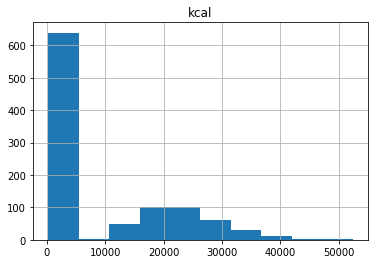

In [40]:
dftest = recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion_mejorado.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=3, max_unidades=11,
                                                  min_kcal=250, max_kcal= 2500,
                                                  numero_recetas=1000
                                                  )

dftest = pd.DataFrame(dftest, columns=['ingredientes', 'kcal', 'carbs', 'prot', 'grasas'])  
dftest[['kcal']].astype(float).hist()

* Entrenar información nutricional


ITERACIÓN: 1
min unidades: 3  max unidades: 11
min kcal: 250  max kcal: 2500
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/100_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/100_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 100  recetas aleatorias...



100%|██████████| 100/100 [00:00<00:00, 112.92it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.79it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_20 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

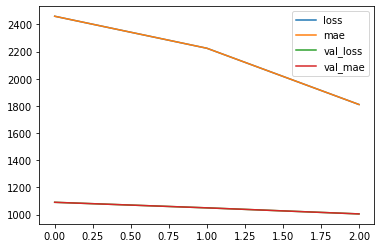

1/1 [==============================] - 0s 207ms/step - loss: 736.0122 - mae: 736.0122
[736.01220703125, 736.01220703125]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 324.0 kcal_pred: 989.23096  precisión: 32.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 103.64539  precisión: 73.3 %
receta 0 protein_true: 8.0 protein_pred: 58.135162  precisión: 13.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 27.9483  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1154.9775  precisión: 37.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 120.23253  precisión: 79.8 %
receta 1 protein_true: 8.0 protein_pred: 66.93119  precisión: 12.0 %
receta 1 total_fat_true: 4.0 total_fat_pred: 32.836754  precisión: 12.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15119.021  precisión: 5.6 %
receta 2 carbohydrate_true: 72.

100%|██████████| 100/100 [00:00<00:00, 145.11it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.80it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_21 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

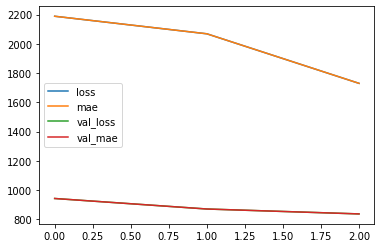

1/1 [==============================] - 0s 271ms/step - loss: 574.5054 - mae: 574.5054
[574.50537109375, 574.50537109375]
1/1 [==============================] - 0s 193ms/step
receta 0 kcal_true: 324.0 kcal_pred: 971.68115  precisión: 33.3 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 101.88207  precisión: 74.6 %
receta 0 protein_true: 8.0 protein_pred: 55.947918  precisión: 14.3 %
receta 0 total_fat_true: 0.0 total_fat_pred: 26.899277  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1108.3971  precisión: 39.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 115.501396  precisión: 83.1 %
receta 1 protein_true: 8.0 protein_pred: 63.024563  precisión: 12.7 %
receta 1 total_fat_true: 4.0 total_fat_pred: 30.840681  precisión: 13.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 11401.275  precisión: 7.4 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:00<00:00, 132.66it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:22<00:00,  4.53it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_22 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

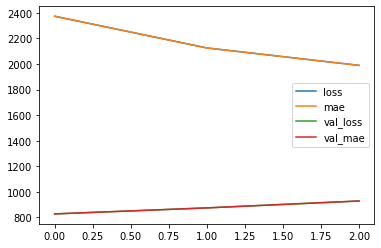

1/1 [==============================] - 0s 275ms/step - loss: 613.8956 - mae: 613.8956
[613.8956298828125, 613.8956298828125]
1/1 [==============================] - 0s 215ms/step
receta 0 kcal_true: 324.0 kcal_pred: 956.1118  precisión: 33.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 100.75366  precisión: 75.4 %
receta 0 protein_true: 8.0 protein_pred: 54.521313  precisión: 14.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 27.007608  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1119.0293  precisión: 39.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 117.07583  precisión: 82.0 %
receta 1 protein_true: 8.0 protein_pred: 62.880962  precisión: 12.7 %
receta 1 total_fat_true: 4.0 total_fat_pred: 31.793726  precisión: 12.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 12350.201  precisión: 6.9 %
receta 2 carbohydrate_tru

100%|██████████| 100/100 [00:00<00:00, 120.47it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_23 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

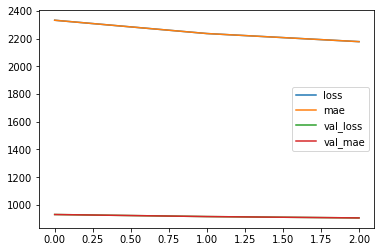

1/1 [==============================] - 0s 220ms/step - loss: 619.5179 - mae: 619.5179
[619.5179443359375, 619.5179443359375]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 324.0 kcal_pred: 949.74646  precisión: 34.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 100.039825  precisión: 76.0 %
receta 0 protein_true: 8.0 protein_pred: 54.121223  precisión: 14.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 26.828627  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1104.2535  precisión: 39.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 115.507454  precisión: 83.1 %
receta 1 protein_true: 8.0 protein_pred: 61.976463  precisión: 12.9 %
receta 1 total_fat_true: 4.0 total_fat_pred: 31.305767  precisión: 12.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 12557.575  precisión: 6.7 %
receta 2 carbohydrate_

100%|██████████| 100/100 [00:00<00:00, 133.87it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_24 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

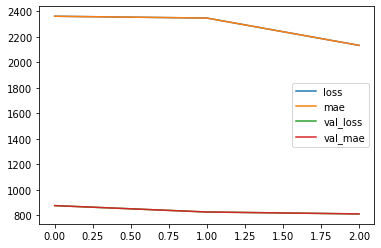

1/1 [==============================] - 0s 269ms/step - loss: 596.7328 - mae: 596.7328
[596.7328491210938, 596.7328491210938]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 324.0 kcal_pred: 1022.06464  precisión: 31.7 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 108.88794  precisión: 69.8 %
receta 0 protein_true: 8.0 protein_pred: 58.204327  precisión: 13.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 29.372404  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1162.9778  precisión: 37.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 123.17842  precisión: 77.9 %
receta 1 protein_true: 8.0 protein_pred: 65.37999  precisión: 12.2 %
receta 1 total_fat_true: 4.0 total_fat_pred: 33.467266  precisión: 12.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 11750.555  precisión: 7.2 %
receta 2 carbohydrate_tr

100%|██████████| 100/100 [00:00<00:00, 137.73it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_25 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

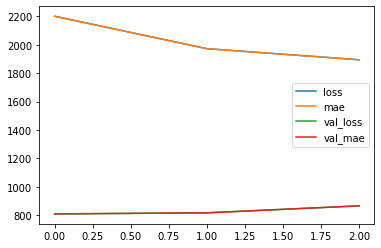

1/1 [==============================] - 0s 218ms/step - loss: 653.5099 - mae: 653.5099
[653.5099487304688, 653.5099487304688]
1/1 [==============================] - 0s 156ms/step
receta 0 kcal_true: 324.0 kcal_pred: 1111.8345  precisión: 29.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 120.58852  precisión: 63.0 %
receta 0 protein_true: 8.0 protein_pred: 63.8433  precisión: 12.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 31.33661  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1276.2913  precisión: 34.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 137.70747  precisión: 69.7 %
receta 1 protein_true: 8.0 protein_pred: 72.37528  precisión: 11.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 36.00908  precisión: 11.1 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 12741.811  precisión: 6.6 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 130.78it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_26 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

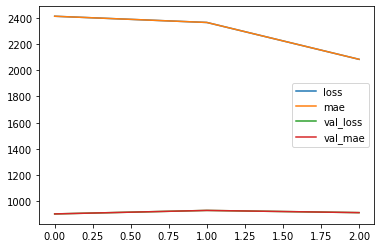

1/1 [==============================] - 0s 226ms/step - loss: 668.2622 - mae: 668.2622
[668.26220703125, 668.26220703125]
1/1 [==============================] - 0s 157ms/step
receta 0 kcal_true: 324.0 kcal_pred: 1113.1255  precisión: 29.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 121.60755  precisión: 62.5 %
receta 0 protein_true: 8.0 protein_pred: 64.65076  precisión: 12.4 %
receta 0 total_fat_true: 0.0 total_fat_pred: 30.412626  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1305.2391  precisión: 33.4 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 141.85931  precisión: 67.7 %
receta 1 protein_true: 8.0 protein_pred: 74.75609  precisión: 10.7 %
receta 1 total_fat_true: 4.0 total_fat_pred: 35.719975  precisión: 11.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13073.868  precisión: 6.5 %
receta 2 carbohydrate_true: 72

100%|██████████| 100/100 [00:00<00:00, 126.44it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_27 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

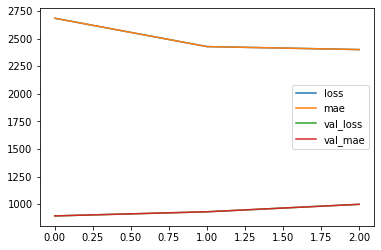

1/1 [==============================] - 0s 248ms/step - loss: 727.3255 - mae: 727.3255
[727.3255004882812, 727.3255004882812]
1/1 [==============================] - 0s 191ms/step
receta 0 kcal_true: 324.0 kcal_pred: 1044.8236  precisión: 31.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 114.64216  precisión: 66.3 %
receta 0 protein_true: 8.0 protein_pred: 61.16717  precisión: 13.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 28.829985  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1246.2264  precisión: 35.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 135.94173  precisión: 70.6 %
receta 1 protein_true: 8.0 protein_pred: 71.77066  precisión: 11.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 34.459007  precisión: 11.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14733.737  precisión: 5.7 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:00<00:00, 107.58it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:24<00:00,  4.10it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_28 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

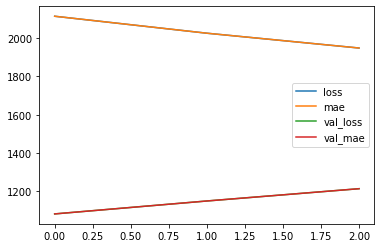

1/1 [==============================] - 0s 274ms/step - loss: 823.2709 - mae: 823.2709
[823.2708740234375, 823.2708740234375]
1/1 [==============================] - 0s 201ms/step
receta 0 kcal_true: 324.0 kcal_pred: 942.3648  precisión: 34.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 104.04264  precisión: 73.0 %
receta 0 protein_true: 8.0 protein_pred: 55.276005  precisión: 14.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 27.24869  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1178.1353  precisión: 37.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 129.01773  precisión: 74.4 %
receta 1 protein_true: 8.0 protein_pred: 67.56409  precisión: 11.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 34.17349  precisión: 11.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 17400.129  precisión: 4.9 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:01<00:00, 83.35it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_29 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

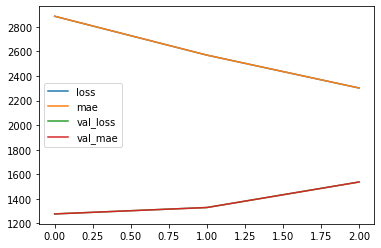

1/1 [==============================] - 0s 272ms/step - loss: 800.8553 - mae: 800.8553
[800.8552856445312, 800.8552856445312]
1/1 [==============================] - 0s 200ms/step
receta 0 kcal_true: 324.0 kcal_pred: 866.3115  precisión: 37.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 96.36516  precisión: 78.9 %
receta 0 protein_true: 8.0 protein_pred: 51.464607  precisión: 15.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 25.41694  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1157.8458  precisión: 37.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 127.49112  precisión: 75.3 %
receta 1 protein_true: 8.0 protein_pred: 66.798676  precisión: 12.0 %
receta 1 total_fat_true: 4.0 total_fat_pred: 34.195755  precisión: 11.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 17151.545  precisión: 4.9 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:00<00:00, 107.06it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_30 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

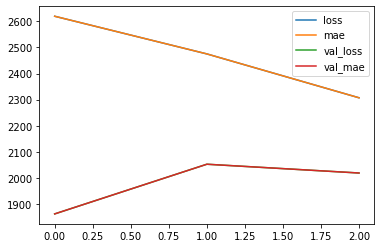

1/1 [==============================] - 0s 210ms/step - loss: 742.4286 - mae: 742.4286
[742.4285888671875, 742.4285888671875]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 822.2119  precisión: 39.4 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 91.13702  precisión: 83.4 %
receta 0 protein_true: 8.0 protein_pred: 49.425724  precisión: 16.2 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.582783  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1139.2625  precisión: 38.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 124.90206  precisión: 76.9 %
receta 1 protein_true: 8.0 protein_pred: 66.189026  precisión: 12.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 31.562483  precisión: 12.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15956.015  precisión: 5.3 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:00<00:00, 144.26it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.80it/s]

datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_31 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                                 
 POOLING_2

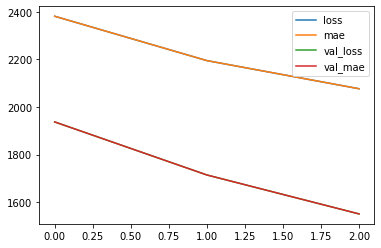

1/1 [==============================] - 0s 224ms/step - loss: 661.8048 - mae: 661.8048
[661.8048095703125, 661.8048095703125]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 324.0 kcal_pred: 757.3618  precisión: 42.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 83.16649  precisión: 91.4 %
receta 0 protein_true: 8.0 protein_pred: 46.7534  precisión: 17.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 19.003271  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1059.5662  precisión: 41.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 114.97996  precisión: 83.5 %
receta 1 protein_true: 8.0 protein_pred: 63.07207  precisión: 12.7 %
receta 1 total_fat_true: 4.0 total_fat_pred: 26.840355  precisión: 14.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14264.288  precisión: 5.9 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 133.87it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.86it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_32 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

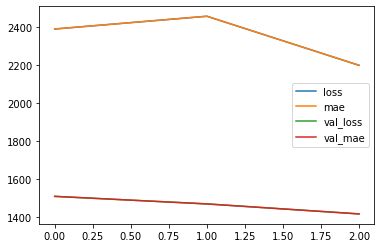

1/1 [==============================] - 0s 217ms/step - loss: 642.0099 - mae: 642.0099
[642.0099487304688, 642.0099487304688]
1/1 [==============================] - 0s 153ms/step
receta 0 kcal_true: 324.0 kcal_pred: 789.73206  precisión: 41.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 86.9764  precisión: 87.4 %
receta 0 protein_true: 8.0 protein_pred: 50.238834  precisión: 15.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 19.30387  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1086.7573  precisión: 40.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 118.41006  precisión: 81.1 %
receta 1 protein_true: 8.0 protein_pred: 66.949776  precisión: 11.9 %
receta 1 total_fat_true: 4.0 total_fat_pred: 26.790876  precisión: 14.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13668.179  precisión: 6.2 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:00<00:00, 160.17it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.90it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_33 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

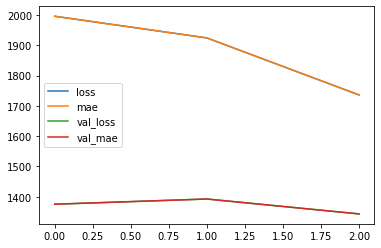

1/1 [==============================] - 0s 266ms/step - loss: 629.6205 - mae: 629.6205
[629.6204833984375, 629.6204833984375]
1/1 [==============================] - 0s 199ms/step
receta 0 kcal_true: 324.0 kcal_pred: 791.5711  precisión: 40.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 86.76011  precisión: 87.6 %
receta 0 protein_true: 8.0 protein_pred: 50.395443  precisión: 15.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 19.520857  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1118.9147  precisión: 39.0 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 121.19607  precisión: 79.2 %
receta 1 protein_true: 8.0 protein_pred: 68.76653  precisión: 11.6 %
receta 1 total_fat_true: 4.0 total_fat_pred: 27.79816  precisión: 14.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13294.891  precisión: 6.4 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:00<00:00, 104.88it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_34 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

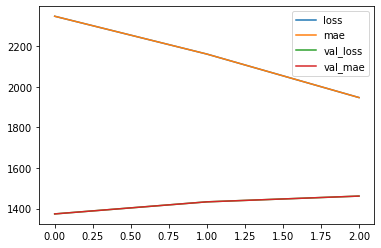

1/1 [==============================] - 0s 277ms/step - loss: 625.8978 - mae: 625.8978
[625.8977661132812, 625.8977661132812]
1/1 [==============================] - 0s 198ms/step
receta 0 kcal_true: 324.0 kcal_pred: 809.73956  precisión: 40.0 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 88.26721  precisión: 86.1 %
receta 0 protein_true: 8.0 protein_pred: 51.13443  precisión: 15.6 %
receta 0 total_fat_true: 0.0 total_fat_pred: 20.309101  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1153.81  precisión: 37.8 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 124.29941  precisión: 77.2 %
receta 1 protein_true: 8.0 protein_pred: 70.27426  precisión: 11.4 %
receta 1 total_fat_true: 4.0 total_fat_pred: 29.115824  precisión: 13.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13135.197  precisión: 6.4 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 121.39it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_35 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

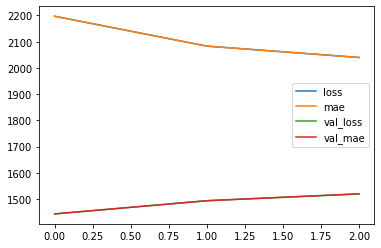

1/1 [==============================] - 0s 267ms/step - loss: 652.3719 - mae: 652.3719
[652.3718872070312, 652.3718872070312]
1/1 [==============================] - 0s 200ms/step
receta 0 kcal_true: 324.0 kcal_pred: 858.6289  precisión: 37.7 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 94.39044  precisión: 80.5 %
receta 0 protein_true: 8.0 protein_pred: 54.61672  precisión: 14.6 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.765104  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1199.6211  precisión: 36.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 130.53345  precisión: 73.5 %
receta 1 protein_true: 8.0 protein_pred: 73.92095  precisión: 10.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 32.054417  precisión: 12.5 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13564.858  precisión: 6.2 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:00<00:00, 104.99it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.87it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_36 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

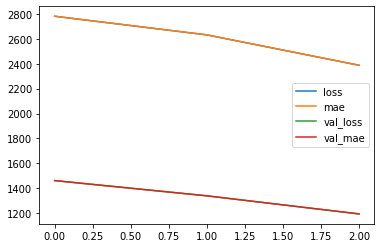

1/1 [==============================] - 0s 226ms/step - loss: 667.0233 - mae: 667.0233
[667.0233154296875, 667.0233154296875]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 858.2052  precisión: 37.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 95.05406  precisión: 80.0 %
receta 0 protein_true: 8.0 protein_pred: 53.733437  precisión: 14.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 22.759626  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1126.5591  precisión: 38.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 123.69974  precisión: 77.6 %
receta 1 protein_true: 8.0 protein_pred: 68.6073  precisión: 11.7 %
receta 1 total_fat_true: 4.0 total_fat_pred: 30.121748  precisión: 13.3 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 13915.586  precisión: 6.1 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:00<00:00, 145.62it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:20<00:00,  4.88it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_37 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

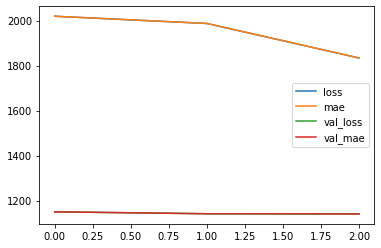

1/1 [==============================] - 0s 341ms/step - loss: 676.2823 - mae: 676.2823
[676.2822875976562, 676.2822875976562]
1/1 [==============================] - 0s 255ms/step
receta 0 kcal_true: 324.0 kcal_pred: 878.8981  precisión: 36.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 97.62735  precisión: 77.8 %
receta 0 protein_true: 8.0 protein_pred: 53.900776  precisión: 14.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 23.173914  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1087.2463  precisión: 40.1 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 119.90313  precisión: 80.1 %
receta 1 protein_true: 8.0 protein_pred: 65.154465  precisión: 12.3 %
receta 1 total_fat_true: 4.0 total_fat_pred: 28.8597  precisión: 13.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14124.384  precisión: 6.0 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:01<00:00, 95.58it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_38 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

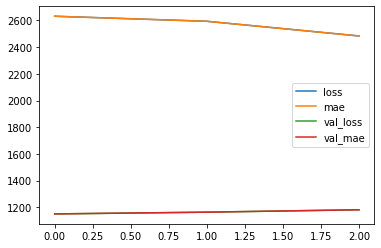

1/1 [==============================] - 0s 313ms/step - loss: 699.1871 - mae: 699.1871
[699.1870727539062, 699.1870727539062]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 887.053  precisión: 36.5 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 98.80146  precisión: 76.9 %
receta 0 protein_true: 8.0 protein_pred: 55.309708  precisión: 14.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 24.661194  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1104.5903  precisión: 39.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 122.133675  precisión: 78.6 %
receta 1 protein_true: 8.0 protein_pred: 67.31207  precisión: 11.9 %
receta 1 total_fat_true: 4.0 total_fat_pred: 30.879562  precisión: 13.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14651.463  precisión: 5.8 %
receta 2 carbohydrate_true:

100%|██████████| 100/100 [00:00<00:00, 129.04it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.57it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_39 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

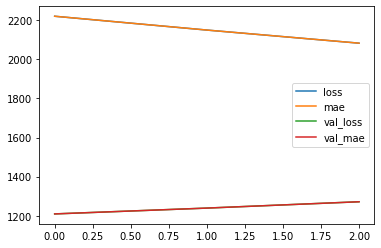

1/1 [==============================] - 0s 293ms/step - loss: 746.5142 - mae: 746.5142
[746.51416015625, 746.51416015625]
1/1 [==============================] - 0s 165ms/step
receta 0 kcal_true: 324.0 kcal_pred: 949.0568  precisión: 34.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 106.520164  precisión: 71.3 %
receta 0 protein_true: 8.0 protein_pred: 62.511772  precisión: 12.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 29.528471  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1165.3685  precisión: 37.4 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 129.95497  precisión: 73.9 %
receta 1 protein_true: 8.0 protein_pred: 75.33502  precisión: 10.6 %
receta 1 total_fat_true: 4.0 total_fat_pred: 36.452698  precisión: 11.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15494.869  precisión: 5.5 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 128.49it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.62it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_40 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

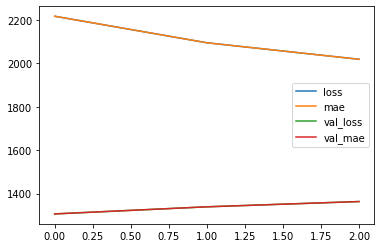

1/1 [==============================] - 0s 297ms/step - loss: 788.2427 - mae: 788.2427
[788.24267578125, 788.24267578125]
1/1 [==============================] - 0s 199ms/step
receta 0 kcal_true: 324.0 kcal_pred: 993.8265  precisión: 32.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 112.61453  precisión: 67.5 %
receta 0 protein_true: 8.0 protein_pred: 67.998474  precisión: 11.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 33.417786  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1216.5751  precisión: 35.8 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 137.01732  precisión: 70.1 %
receta 1 protein_true: 8.0 protein_pred: 81.952095  precisión: 9.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 41.15496  precisión: 9.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 16264.462  precisión: 5.2 %
receta 2 carbohydrate_true: 72.0

100%|██████████| 100/100 [00:00<00:00, 137.17it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_41 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

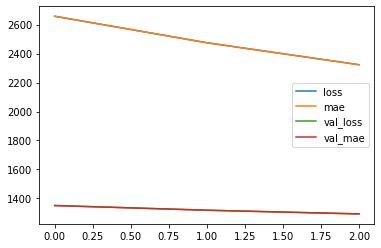

1/1 [==============================] - 0s 277ms/step - loss: 729.9731 - mae: 729.9731
[729.9730834960938, 729.9730834960938]
1/1 [==============================] - 0s 206ms/step
receta 0 kcal_true: 324.0 kcal_pred: 923.6856  precisión: 35.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 104.85982  precisión: 72.5 %
receta 0 protein_true: 8.0 protein_pred: 62.86364  precisión: 12.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 31.229572  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1125.9443  precisión: 38.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 127.0219  precisión: 75.6 %
receta 1 protein_true: 8.0 protein_pred: 75.37547  precisión: 10.6 %
receta 1 total_fat_true: 4.0 total_fat_pred: 38.29527  precisión: 10.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15159.123  precisión: 5.6 %
receta 2 carbohydrate_true: 7

100%|██████████| 100/100 [00:00<00:00, 111.91it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.67it/s]

datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_42 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                                 
 POOLING_2

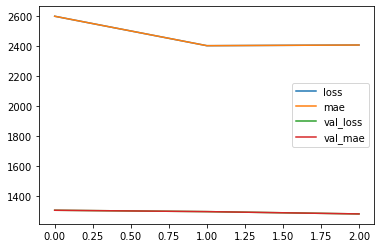

1/1 [==============================] - 0s 228ms/step - loss: 727.3939 - mae: 727.3939
[727.3938598632812, 727.3938598632812]
1/1 [==============================] - 0s 165ms/step
receta 0 kcal_true: 324.0 kcal_pred: 849.80786  precisión: 38.1 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 97.281654  precisión: 78.1 %
receta 0 protein_true: 8.0 protein_pred: 57.361156  precisión: 13.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 29.016197  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1085.0894  precisión: 40.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 123.16509  precisión: 77.9 %
receta 1 protein_true: 8.0 protein_pred: 71.57602  precisión: 11.2 %
receta 1 total_fat_true: 4.0 total_fat_pred: 37.23811  precisión: 10.7 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15333.107  precisión: 5.5 %
receta 2 carbohydrate_true

100%|██████████| 100/100 [00:00<00:00, 143.65it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_43 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

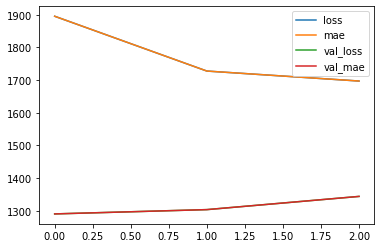

1/1 [==============================] - 0s 272ms/step - loss: 696.3979 - mae: 696.3979
[696.3978881835938, 696.3978881835938]
1/1 [==============================] - 0s 213ms/step
receta 0 kcal_true: 324.0 kcal_pred: 880.8333  precisión: 36.8 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 100.796844  precisión: 75.4 %
receta 0 protein_true: 8.0 protein_pred: 58.228596  precisión: 13.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 29.194143  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1113.5852  precisión: 39.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 126.42202  precisión: 75.9 %
receta 1 protein_true: 8.0 protein_pred: 71.939735  precisión: 11.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 37.09649  precisión: 10.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14516.201  precisión: 5.8 %
receta 2 carbohydrate_tru

100%|██████████| 100/100 [00:00<00:00, 113.43it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_44 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

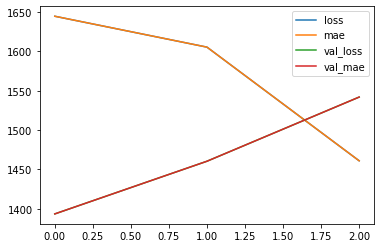

1/1 [==============================] - 0s 273ms/step - loss: 694.1861 - mae: 694.1861
[694.1860961914062, 694.1860961914062]
1/1 [==============================] - 0s 208ms/step
receta 0 kcal_true: 324.0 kcal_pred: 855.0716  precisión: 37.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 97.69829  precisión: 77.8 %
receta 0 protein_true: 8.0 protein_pred: 55.430706  precisión: 14.4 %
receta 0 total_fat_true: 0.0 total_fat_pred: 28.05762  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1106.3785  precisión: 39.4 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 125.25346  precisión: 76.6 %
receta 1 protein_true: 8.0 protein_pred: 69.74469  precisión: 11.5 %
receta 1 total_fat_true: 4.0 total_fat_pred: 36.504585  precisión: 11.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14594.839  precisión: 5.8 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:00<00:00, 140.62it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_45 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

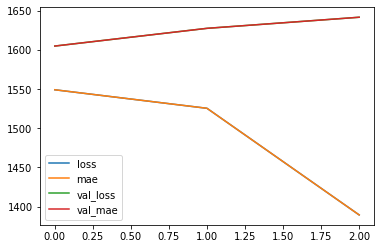

1/1 [==============================] - 0s 272ms/step - loss: 690.8786 - mae: 690.8786
[690.8786010742188, 690.8786010742188]
1/1 [==============================] - 0s 209ms/step
receta 0 kcal_true: 324.0 kcal_pred: 841.6529  precisión: 38.5 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 96.80718  precisión: 78.5 %
receta 0 protein_true: 8.0 protein_pred: 54.390865  precisión: 14.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 28.500717  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1109.0588  precisión: 39.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 126.33096  precisión: 76.0 %
receta 1 protein_true: 8.0 protein_pred: 69.58675  precisión: 11.5 %
receta 1 total_fat_true: 4.0 total_fat_pred: 37.86395  precisión: 10.6 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14576.086  precisión: 5.8 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:01<00:00, 94.68it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_46 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

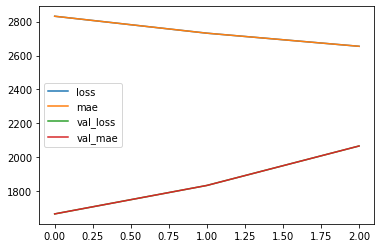

1/1 [==============================] - 0s 240ms/step - loss: 718.5801 - mae: 718.5801
[718.580078125, 718.580078125]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 324.0 kcal_pred: 883.144  precisión: 36.7 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 103.25407  precisión: 73.6 %
receta 0 protein_true: 8.0 protein_pred: 57.66821  precisión: 13.9 %
receta 0 total_fat_true: 0.0 total_fat_pred: 32.124474  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1184.4025  precisión: 36.8 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 137.22676  precisión: 70.0 %
receta 1 protein_true: 8.0 protein_pred: 75.23433  precisión: 10.6 %
receta 1 total_fat_true: 4.0 total_fat_pred: 43.49091  precisión: 9.2 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15058.352  precisión: 5.6 %
receta 2 carbohydrate_true: 72.0 carbo

100%|██████████| 100/100 [00:00<00:00, 139.66it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.76it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_47 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

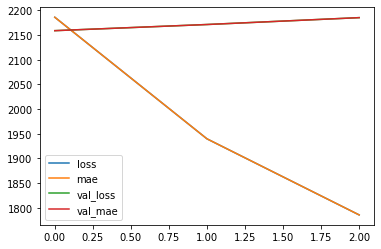

1/1 [==============================] - 0s 238ms/step - loss: 723.6767 - mae: 723.6767
[723.6766967773438, 723.6766967773438]
1/1 [==============================] - 0s 154ms/step
receta 0 kcal_true: 324.0 kcal_pred: 839.5829  precisión: 38.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 99.11312  precisión: 76.7 %
receta 0 protein_true: 8.0 protein_pred: 55.017204  precisión: 14.5 %
receta 0 total_fat_true: 0.0 total_fat_pred: 31.701012  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1170.0192  precisión: 37.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 136.75635  precisión: 70.2 %
receta 1 protein_true: 8.0 protein_pred: 74.28725  precisión: 10.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 44.572933  precisión: 9.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15309.887  precisión: 5.5 %
receta 2 carbohydrate_true: 

100%|██████████| 100/100 [00:00<00:00, 133.86it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:22<00:00,  4.46it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_48 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

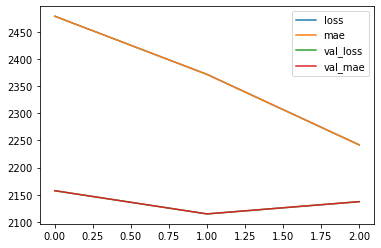

1/1 [==============================] - 0s 217ms/step - loss: 748.4576 - mae: 748.4576
[748.4575805664062, 748.4575805664062]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 798.5171  precisión: 40.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 95.48156  precisión: 79.6 %
receta 0 protein_true: 8.0 protein_pred: 52.90717  precisión: 15.1 %
receta 0 total_fat_true: 0.0 total_fat_pred: 31.173203  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1125.9502  precisión: 38.7 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 133.28806  precisión: 72.0 %
receta 1 protein_true: 8.0 protein_pred: 72.11309  precisión: 11.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 44.370907  precisión: 9.0 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 15972.88  precisión: 5.3 %
receta 2 carbohydrate_true: 72

100%|██████████| 100/100 [00:00<00:00, 145.53it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_49 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

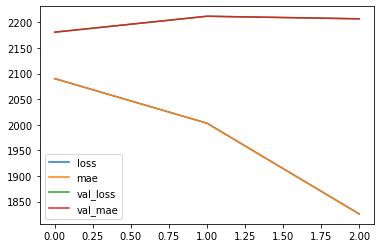

1/1 [==============================] - 0s 216ms/step - loss: 766.9576 - mae: 766.9576
[766.9575805664062, 766.9575805664062]
1/1 [==============================] - 0s 155ms/step
receta 0 kcal_true: 324.0 kcal_pred: 820.08044  precisión: 39.5 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 98.38744  precisión: 77.2 %
receta 0 protein_true: 8.0 protein_pred: 54.42313  precisión: 14.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 32.612747  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1113.1902  precisión: 39.2 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 132.49925  precisión: 72.5 %
receta 1 protein_true: 8.0 protein_pred: 71.81673  precisión: 11.1 %
receta 1 total_fat_true: 4.0 total_fat_pred: 44.772137  precisión: 8.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 16377.883  precisión: 5.2 %
receta 2 carbohydrate_true: 

In [52]:
recomendador128.NUM_RECETAS = 10000
recomendador128.EMB_SIZE = 128
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = 35
BATCHSIZE = 32
LR = 1e-5

Rangos_kcal = [
                #(350, 1500),
                #(300, 1000)
                (250, 2500)          
              ]

Histories = []
for iteracion in range(ITER):
  MINU = 3 
  MAXU = 11  
  #INITIAL_EPOCH = 0

  for ik in range(len(Rangos_kcal)):
    MINK, MAXK = Rangos_kcal[ik]
    print('\nITERACIÓN:', iteracion+1)
    print('min unidades:',MINU, ' max unidades:', MAXU)
    print('min kcal:', MINK, ' max kcal:', MAXK)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion_mejorado.csv',
                                  #df_training='recipes_con_info_nutricional.csv',
                                  df_test='recetas_test.csv', 
                                  df_val='recetas_val.csv',
                                  learning_rate=LR,
                                  version=version, 
                                  initial_epoch = INITIAL_EPOCH,                             
                                  epochs=INITIAL_EPOCH + EPOCHS, 
                                  batch_size=BATCHSIZE,
                                  kernels=128,                                             
                                  min_ingredientes=5, max_ingredientes=11,
                                  #min_ingredientes=3, max_ingredientes=16,
                                  min_unidades=MINU, max_unidades=MAXU,  
                                  min_kcal=MINK, max_kcal= MAXK,                             
                                  save=True, verbose=True)
    INITIAL_EPOCH = history.epoch[-1]

    Histories.append(history)


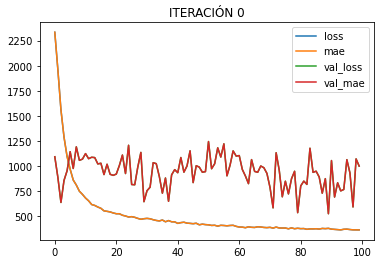

LOSS: 358.6531982421875  -- MAE: 358.6531982421875  -- VAL_LOSS: 996.2946166992188  -- VAL_MAE: 996.2946166992188
----------------------------------------------------------


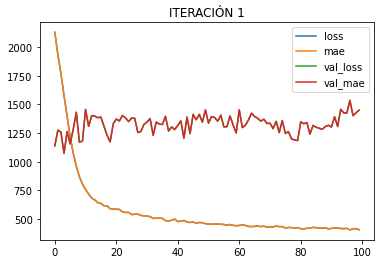

LOSS: 406.7725830078125  -- MAE: 406.7725830078125  -- VAL_LOSS: 1450.291015625  -- VAL_MAE: 1450.291015625
----------------------------------------------------------


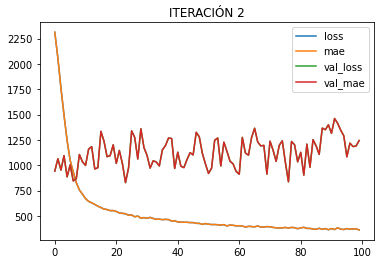

LOSS: 360.921630859375  -- MAE: 360.921630859375  -- VAL_LOSS: 1243.41455078125  -- VAL_MAE: 1243.41455078125
----------------------------------------------------------


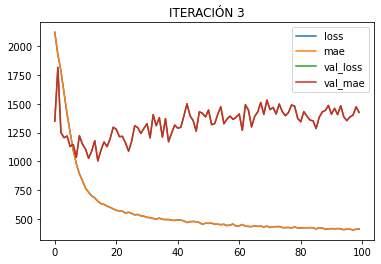

LOSS: 411.6185302734375  -- MAE: 411.6185302734375  -- VAL_LOSS: 1425.681396484375  -- VAL_MAE: 1425.681396484375
----------------------------------------------------------


In [7]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

* Entrenar precios


ITERACIÓN: 1
Entrenando desde epoch 0
------------------------------------------

Generando 100  recetas aleatorias...



100%|██████████| 100/100 [00:00<00:00, 396.31it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_9 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

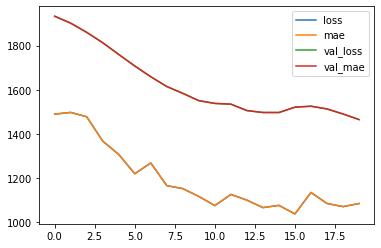

1/1 [==============================] - 0s 357ms/step - loss: 168.5878 - mae: 168.5878
[168.5878448486328, 168.5878448486328]
1/1 [==============================] - 0s 360ms/step
receta 0 precio_prom_por_gramo_true: 17.34 precio_prom_por_gramo_pred: 28.393808  precisión: 61.1 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 176.2 precio_prom_por_gramo_pred: 134.73662  precisión: 76.4 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 12104.0 precio_prom_por_gramo_pred: 11187.484  precisión: 92.4 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 28.03 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 499.8 precio_prom_por_gramo_pred: 537.23615  precisión: 93.0 %
-----------------------

100%|██████████| 100/100 [00:00<00:00, 334.23it/s]


Calculando vector de características de 100 recetas...


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_10 (Bat  (None, 128, 768)         3072      
 chNormalization)                                                
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

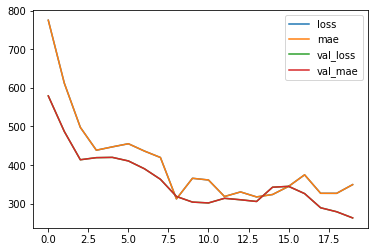

1/1 [==============================] - 0s 308ms/step - loss: 2222.9263 - mae: 2222.9263
[2222.92626953125, 2222.92626953125]
1/1 [==============================] - 0s 275ms/step
receta 0 precio_prom_por_gramo_true: 229.6 precio_prom_por_gramo_pred: 151.47485  precisión: 66.0 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 212.5 precio_prom_por_gramo_pred: 347.7243  precisión: 61.1 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 600.5 precio_prom_por_gramo_pred: 532.62994  precisión: 88.7 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 9950.0 precio_prom_por_gramo_pred: 130.0047  precisión: 1.3 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 634.0 precio_prom_por_gramo_pred: 655.0654  precisión: 96.8 %
---------------------

In [12]:
recomendador128.NUM_RECETAS = 100
recomendador128.EMB_SIZE = 128
ITER = 2
INITIAL_EPOCH = 0
EPOCHS = 20
BATCHSIZE = 32


Histories_precios = []
for iteracion in range(ITER):
    print('\nITERACIÓN:', iteracion+1)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128_precios, history_precios = recomendador128.EntrenarModeloPrecios(
                                    df_precios='lista_precios_profeco_2022.csv',                                   
                                    learning_rate=1e-3,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    batch_size=BATCHSIZE,
                                    kernels=128,                                                                         
                                    save=True, verbose=True)
    INITIAL_EPOCH = history_precios.epoch[-1]

    Histories_precios.append(history_precios)

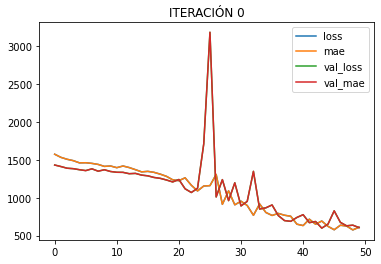

LOSS: 610.884521484375  -- MAE: 610.884521484375  -- VAL_LOSS: 605.876708984375  -- VAL_MAE: 605.876708984375
----------------------------------------------------------


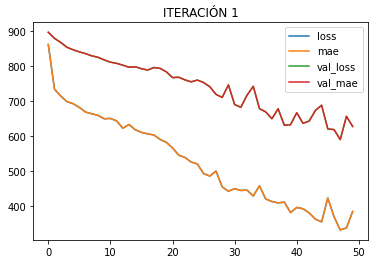

LOSS: 384.781494140625  -- MAE: 384.781494140625  -- VAL_LOSS: 627.9765014648438  -- VAL_MAE: 627.9765014648438
----------------------------------------------------------


In [10]:
for i in range(len(Histories_precios)):
    history = Histories_precios[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')